In [673]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
from collections import Counter
from jupyterplot import ProgressPlot
%matplotlib inline

In [1334]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self ,n, endpoint, diffusion_coefficient):

        assert (type(n)==int)
        assert (type(endpoint)==int or type(endpoint) == float)
        assert (type(diffusion_coefficient) == int or type(diffusion_coefficient) == float)
        
        #assert ratio of points to time interval must be greater than some value 

        self.n = n
        self.endpoint = endpoint
        self.diffusion_coefficient = diffusion_coefficient
        self.points = []
        self.normals = []
        self.t = 0
        self.depth = 0
        
    def set_normals(self, depth = 1): # add dimensions attribute
        for i in range(depth):
            increments = self.diffusion_coefficient*np.sqrt(self.t) * np.random.normal(size = self.n - 1)
            self.normals.append([0])
            self.normals[i].extend(np.cumsum(increments))
        
    def set_increments(self):
        self.points = np.linspace(0, self.endpoint, self.n, endpoint=True)
        self.t = self.points[1] - self.points[0]
        
    def set_depth(self, depth):
        self.depth = depth
        
    def three_d_graph(self):
        assert(self.depth == 2)
        
        fig = plt.figure()
        ax = plt.axes(projection='3d')
    
        zline = self.normals[1]
        xline = self.points
        yline = self.normals[0]
        ax.plot3D(xline, yline, zline)
    

In [1296]:
def liveplot(*objects):

    #pp = ProgressPlot(x_iterator=False, x_lim=[0, objects[0].endpoint], y_lim=[-3, 3])
    
    for obj in objects:
        
        obj.set_increments()
        obj.set_normals()
        
    for obj in objects:
        #for j in range(obj.n):
    
        x = [list(x) for x in zip(*obj.normals)]
        plt.plot(obj.points, x)
            #pp.update(obj.points[j], obj.normals[j])
    plt.show()
    #pp.finalize()

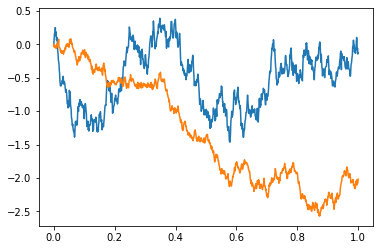

In [1327]:
a = Brownian(1000,1,1)
b = Brownian(1000,1,2)
liveplot(b,a)

In [1009]:
def reflection_principle(obj, asymptote):
    
    pp = ProgressPlot(x_iterator=False, line_names=["B(u)", "B*(u)"])
    
    obj.set_increments()
    obj.set_normals()
        
    reflect = False

    for j in range(obj.n):
        
        if(obj.points[j]) >= asymptote:
            reflect = True
            
        if reflect == True:
            pp.update(obj.points[j], [[obj.normals[j], asymptote - obj.normals[j]]])
        else:
            pp.update(obj.points[j], [[obj.normals[j], obj.normals[j]]])
    pp.finalize()
        

In [1011]:
a = Brownian(10000,1, 1)
reflection_principle(a,.1)

In [1282]:
def multidimensional_Brownian(obj, depth):

    obj.set_depth(depth)
    obj.set_increments()
    obj.set_normals(depth)
    
    x = [list(x) for x in zip(*a.normals)]
    plt.plot(obj.points, x)

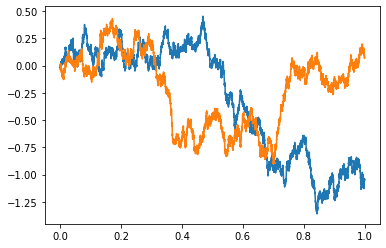

In [1336]:
a = Brownian(10000,1, 1)
multidimensional_Brownian(a, 2)

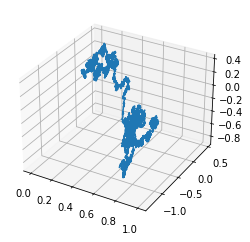

In [1337]:
a.three_d_graph()